# K-Means Clustering Example

Let's make some fake data that includes people clustered by income and age, randomly:

In [83]:
from numpy import random, array

#Create fake income/age clusters for N people in k clusters
def createClusteredData(people, clusters):
    random.seed(10)
    pointsPerCluster = float(people)/clusters
    X = []
    for i in range (clusters):
        incomeCentroid = random.uniform(20000.0, 200000.0)
        ageCentroid = random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([random.normal(incomeCentroid, 10000.0), random.normal(ageCentroid, 2.0)])
    return array(X)

Let's generate sample data for 5 clusters

In [86]:
data = createClusteredData(1500, 5)
random.shuffle(data)

We'll use k-means to rediscover these clusters in unsupervised learning:

Calculations will be done for 4 clusters
[3 3 0 2 2 2 3 1 3 2 0 0 3 1 3 2 3 2 2 1 1 2 2 2 2 1 1 0 0 2 2 2 3 3 0 3 2
 2 2 0 2 3 2 2 2 1 0 2 1 1 3 2 0 0 0 2 0 3 2 3 1 1 3 0 2 0 3 0 2 2 2 2 0 3
 0 1 3 0 2 3 1 3 0 2 1 2 2 2 3 1 2 3 2 2 0 2 2 1 3 1 1 2 2 1 2 0 0 3 2 2 2
 0 3 2 2 2 1 0 1 2 2 0 0 1 2 1 2 0 3 2 2 2 3 0 3 2 1 0 0 2 1 2 3 2 3 1 2 2
 2 0 2 2 1 2 0 2 1 2 1 2 2 3 3 2 2 0 1 2 1 1 0 0 1 1 0 3 3 2 0 0 2 1 3 0 1
 0 3 0 1 1 2 3 3 2 1 3 2 2 1 2]


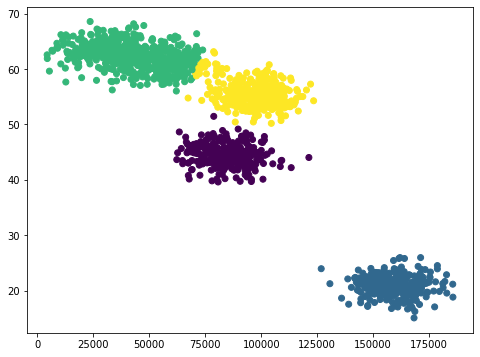

In [88]:
# %matplotlib inline

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float

# You can set n of clusters or leave sklearn to decide how many they are
model = KMeans(n_clusters=4)
# model = KMeans()
print(f"Calculations will be done for {model.n_clusters} clusters")

# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(scale(data))

# We can look at the clusters each data point was assigned to
print(model.labels_[:200])

# And we'll visualize it:
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(float))
plt.show()

## Activity

Things to play with: what happens if you don't scale the data? What happens if you choose different values of K? In the real world, you won't know the "right" value of K to start with - you'll need to converge on it yourself.